<div style="text-align: center;">
        <h1 style="color: black;">Benefício de Prestação Continuada <br> 👩‍🦽<span style="color: blue;">BPC</span> &#x1F475;</h1>
</div>

 <div style="text-align: justify">
        <p>O  <span style="color: blue;">BPC</span> é o pagamento de um salário mínimo mensal ao idoso acima de 65 anos ou à pessoa com deficiência de qualquer idade com impedimentos de natureza física, mental, intelectual ou sensorial de longo prazo que comprovem não possuir meios de prover à própria manutenção ou tê-la provida por sua família. E cuja renda por pessoa do grupo familiar menor que 1/4 do salário-mínimo per capita vigente.</p>
         <p>Aqui, analisaremos o peso do benefício nos municípios brasileiros no ano de 2022 e, para tanto, utilizaremos como base o Fundo de Participação dos Municípios -  <span style="color: blue;">FPM</span> que é a maneira como a União repassa verbas para as cidades, cujo percentual, dentre outros fatores, é determinado principalmente pela proporção do número de habitantes estimado anualmente pelo IBGE. </p>
        <p> Isso significa que quanto maior o índice (a relação entre o BPC e o FPM), maior é o peso do benefício no município.</p>
        <p> Os índices foram divididos em 11 classes: <b>Classe 1</b> - Índice de 0 a 10%; <b>Classe 2</b> - Índice de 11 a 20%; <b>Classe 3</b> - Índice de 21 a 30%; <b>Classe 4</b> - Índice de 31 a 40%; <b>Classe 5</b> - Índice de 41 a 50%; <b>Classe 6</b> - Índice de 51 a 60%; <b>Classe 7</b> - Índice de 61 a 70%; <b>Classe 8</b> - Índice de 71 a 80%; <b>Classe 9</b> - Índice de 81 a 90%; <b>Classe 10</b> - Índice de 91 a 100%; <b>Classe 11</b> - Índice maior que 100%.<p> 

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import os
import plotly.io as pio
import math
from geojson_rewind import rewind
pio.renderers.default = 'iframe'
import streamlit as st

In [2]:
#carregando os arquivos
df_bpc_2022 = pd.read_csv('https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2022*&fq=tipo_s:mes_mu&wt=csv&q=*&rows=100000000&sort=anomes_s%20asc,%20codigo_ibge%20asc&fl=ibge:codigo_ibge,anomes:anomes_s,bpc_ben:bpc_ben_i,bpc_pcd_ben:bpc_pcd_ben_i,bpc_idoso_ben:bpc_idoso_ben_i,bpc_pcd_val:bpc_pcd_val_s,bpc_idoso_val:bpc_idoso_val_s,bpc_val:bpc_val_s')

df_fpm_2022 = pd.read_csv('data\Bases\FPM-por-Municipio.csv', sep = ";", encoding = 'ISO-8859-1')

df_mul_siafi_ibge = pd.read_excel('data\Bases\municipios.xlsx')#este arquivo foi utilizado para relacionar o código siafi com o código IBGE

regioes = pd.read_json('data\Bases\municipios-poligonos.json')#este arquivo foi utilizado para relacionar o código IBGE com os estados e regiões

In [3]:
regioes

,_id,ufCodigo,ufNome,ufSigla,mesorregiaoCodigo,mesorregiaoNome,microrregiaoCodigo,microrregiaoNome,municipioCodigo,municipioCodigoAbreviado,municipioNome,poligono,kmlBrasil
0,"Ipixuna, AM",13,Amazonas,AM,2,Sudoeste Amazonense,4,Juruá,1301803,1803,Ipixuna,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",IPIXUNA
1,"Feijó, AC",12,Acre,AC,1,Vale do Juruá,2,Tarauacá,1200302,302,Feijó,"{'type': 'MultiPolygon', 'coordinates': [[[[-6...",FEIJO
2,"Pacajá, PA",15,Pará,PA,5,Sudoeste Paraense,15,Altamira,1505486,5486,Pacajá,"{'type': 'MultiPolygon', 'coordinates': [[[[-4...",PACAJA
3,"Vitória do Xingu, PA",15,Pará,PA,5,Sudoeste Paraense,15,Altamira,1508357,8357,Vitória do Xingu,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",VITORIA_DO_XINGU
4,"Aurora do Tocantins, TO",17,Tocantins,TO,2,Oriental do Tocantins,8,Dianópolis,1702703,2703,Aurora do Tocantins,"{'type': 'MultiPolygon', 'coordinates': [[[[-4...",AURORA_DO_TOCANTINS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,"Guia Lopes da Laguna, MS",50,Mato Grosso do Sul,MS,4,Sudoeste de Mato Grosso do Sul,9,Bodoquena,5004106,4106,Guia Lopes da Laguna,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",GUIA_LOPES_DA_LAGUNA
5563,"Santa Rita do Pardo, MS",50,Mato Grosso do Sul,MS,3,Leste de Mato Grosso do Sul,7,Três Lagoas,5007554,7554,Santa Rita do Pardo,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",SANTA_RITA_DO_PARDO
5564,"Aripuanã, MT",51,Mato Grosso,MT,1,Norte Mato-grossense,1,Aripuanã,5101407,1407,Aripuanã,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",ARIPUANA
5565,"Cachoeira de Goiás, GO",52,Goiás,GO,3,Centro Goiano,8,Iporá,5204201,4201,Cachoeira de Goiás,"{'type': 'MultiPolygon', 'coordinates': [[[[-5...",CACHOEIRA_DE_GOIAS


In [4]:
#limpando a base de dados do BPC-2022
df_bpc_2022['ano'] = df_bpc_2022['anomes'].apply(lambda x: int(str(x)[:4]))#separando mês e ano para uma futura comparação mês a mês (na análise não fizemos esta comparação)
df_bpc_2022['mês'] = df_bpc_2022['anomes'].apply(lambda x: int(str(x)[4:]))
df_bpc_2022 = df_bpc_2022.drop('anomes', axis=1)
df_bpc_2022.rename(columns={'ibge': 'ibge_6'}, inplace=True)

df_bpc_por_mul =  df_bpc_2022.groupby('ibge_6').agg(
    ano  = ('ano', 'first'),
    bpc_ben = ('bpc_ben', 'sum'),
    bpc_pcd_ben = ( 'bpc_pcd_ben','sum'),
    bpc_idoso_ben = ( 'bpc_idoso_ben','sum'),
    bpc_pcd_val = ( 'bpc_pcd_val','sum'),
    bpc_idoso_val = ('bpc_idoso_val','sum'),
    bpc_val = ('bpc_val', 'sum')
)
df_bpc_por_mul = df_bpc_por_mul.reset_index()

In [5]:
#limpando a base de dados do FPM

df_fpm_2022 = df_fpm_2022.drop(['Município', 'UF'], axis=1)

df_fpm_2022 = df_fpm_2022.dropna()

df_fpm_2022['2022'] = df_fpm_2022['2022'].str.replace('-','0')#transformando os valores em float

df_fpm_2022['2022'] = df_fpm_2022['2022'].str.replace('.','',2)

df_fpm_2022['2022'] = df_fpm_2022['2022'].str.replace(',', '.').astype(float)

In [6]:
#limpando a base de dados com código siafi

df_mul_siafi_ibge = df_mul_siafi_ibge.drop(['capital', 'codigo_uf', 'ddd', 'fuso_horario'], axis=1)
df_mul_siafi_ibge.rename(columns={'codigo_ibge': 'ibge_6'}, inplace=True)
df_mul_siafi_ibge['ibge_6'] = df_mul_siafi_ibge['ibge_6'].apply(lambda x: int(str(x)[:6]))#transformando o código IBGE de 7 dígitos em 6 dígitos

In [7]:
#incluindo o código IBGE na base do FPM
df_fpm_2022['ibge_6'] = df_fpm_2022['COD_MUN'].map(df_mul_siafi_ibge.set_index('siafi_id')['ibge_6'])

In [8]:
#Agrupando a base do FPM por município
df_fpm_por_mul =  df_fpm_2022.groupby('ibge_6').agg(
    Município_UF = ('Município - UF', 'first'),
    repasse_fpm = ('2022', 'sum')
)
df_fpm_por_mul = df_fpm_por_mul.reset_index()

In [9]:
# incluindo a base do FPM na base do BPC
df_bpc_fpm = pd.merge(df_bpc_por_mul, df_fpm_por_mul, left_on = ['ibge_6'], 
         right_on=['ibge_6'], how = 'outer')

In [10]:
#incluindo a coluna da relação FPM com BPC e analisando os resultados
df_bpc_fpm['fpm_bpc'] =df_bpc_fpm['bpc_val']/df_bpc_fpm['repasse_fpm']*100
df_bpc_fpm.describe()

,ibge_6,ano,bpc_ben,bpc_pcd_ben,bpc_idoso_ben,bpc_pcd_val,bpc_idoso_val,bpc_val,repasse_fpm,fpm_bpc
count,5570.000000,5570.0,5.570000e+03,5570.000000,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.569000e+03,5569.000000
mean,325358.627828,2022.0,1.049955e+04,5700.602513,4.798944e+03,6.913409e+06,5.821921e+06,1.273533e+07,2.627572e+07,25.564295
std,98491.033878,0.0,5.557197e+04,23579.791456,3.270976e+04,2.859884e+07,3.968308e+07,6.741174e+07,4.491662e+07,29.209449
min,110001.000000,2022.0,6.000000e+00,3.000000,0.000000e+00,3.636600e+03,0.000000e+00,7.272600e+03,4.817499e+06,0.069398
25%,251212.500000,2022.0,8.262500e+02,560.250000,2.220000e+02,6.799384e+05,2.693702e+05,1.002636e+06,1.202004e+07,8.046183
50%,314627.500000,2022.0,2.365000e+03,1533.500000,7.280000e+02,1.858618e+06,8.829464e+05,2.869441e+06,1.660055e+07,17.534930
75%,411918.750000,2022.0,7.230000e+03,4543.250000,2.511750e+03,5.507725e+06,3.046994e+06,8.770101e+06,2.675561e+07,32.958165
max,530010.000000,2022.0,2.633985e+06,971999.000000,1.661986e+06,1.179028e+09,2.016367e+09,3.195395e+09,1.263095e+09,722.804191


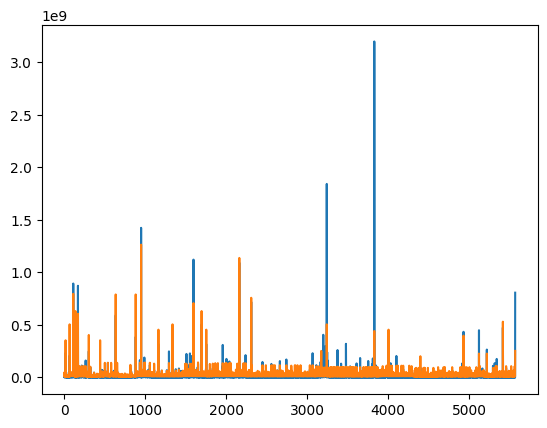

In [11]:
#visualizando os dados do BPC por FPM
plt.plot(df_bpc_fpm['bpc_val']);
plt.plot(df_bpc_fpm['repasse_fpm']);

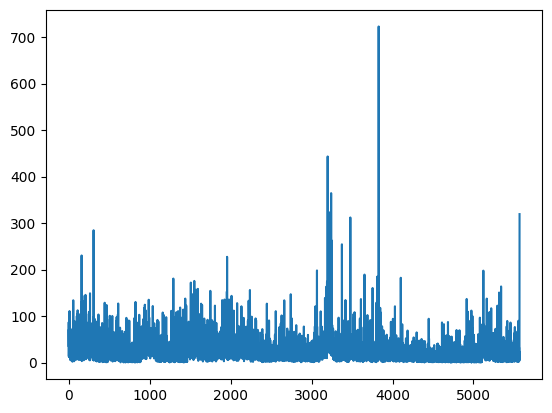

In [12]:
#visualizando os dados do índice de BPC por FPM
plt.plot(df_bpc_fpm['fpm_bpc']);

<Axes: >

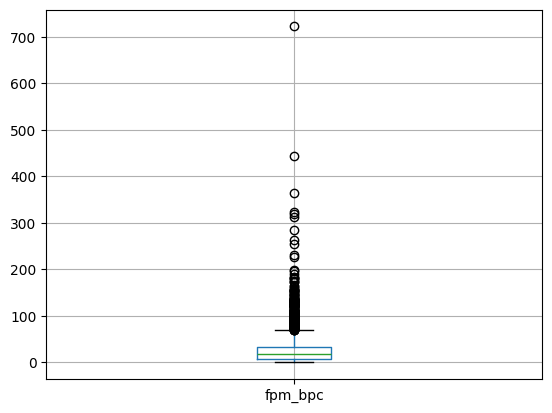

In [13]:
#visuzalizando outliers
df_bpc_fpm[['fpm_bpc']].boxplot()

In [14]:
#Maiores e menores valores
indice_max = df_bpc_fpm['fpm_bpc'].idxmax()
linha_max = df_bpc_fpm.loc[indice_max]
print(linha_max)
print('******************')
maiores_valores = df_bpc_fpm['fpm_bpc'].nlargest(10)
menores_valores = df_bpc_fpm['fpm_bpc'].nsmallest(10)
print(maiores_valores)
print('******************')
print(menores_valores)

ibge_6                   355030
ano                        2022
bpc_ben                 2633985
bpc_pcd_ben            971999.0
bpc_idoso_ben         1661986.0
bpc_pcd_val       1179028227.29
bpc_idoso_val     2016366837.97
bpc_val           3195395065.26
Município_UF     São Paulo - SP
repasse_fpm        442083084.93
fpm_bpc              722.804191
Name: 3829, dtype: object
******************
3829    722.804191
3199    443.197840
3242    364.299404
3224    322.933582
5569    319.213344
3479    311.965582
308     284.499485
3247    262.812670
3375    254.246636
160     230.249065
Name: fpm_bpc, dtype: float64
******************
4394    0.069398
5088    0.126837
702     0.151358
4716    0.158546
4724    0.158546
5077    0.179686
4976    0.232534
1248    0.232659
680     0.244508
5034    0.306526
Name: fpm_bpc, dtype: float64


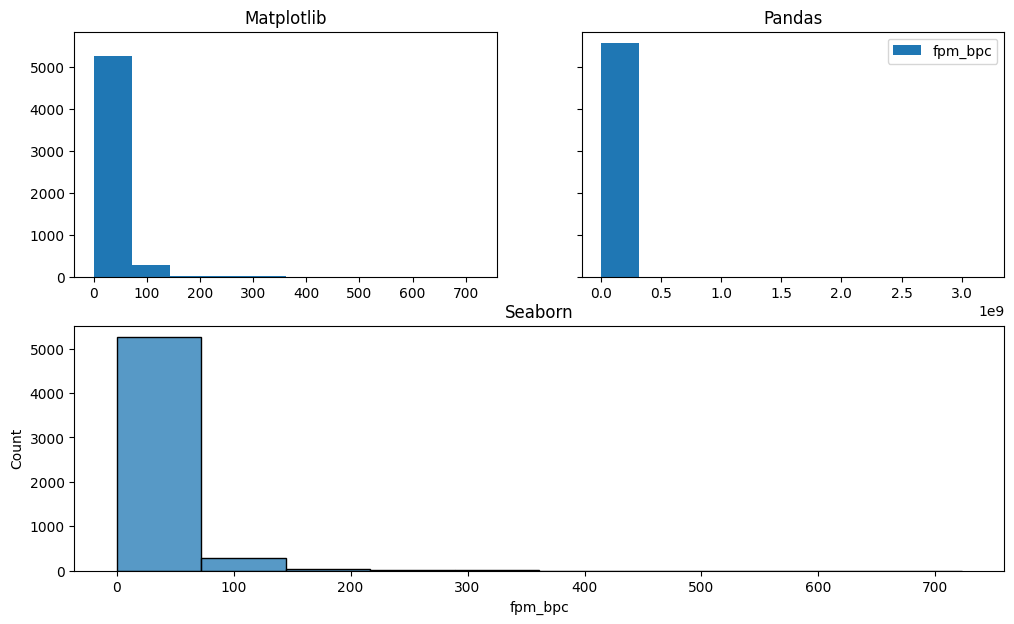

In [15]:
#visualizando dados com outliers
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=df_bpc_fpm['fpm_bpc'], bins=10);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
df_bpc_fpm.plot.hist(column='fpm_bpc', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=df_bpc_fpm, x='fpm_bpc', 
             multiple='stack', bins=10, ax=ax3);
             
# sns.histplot(data=pd_pbf_cadUnico, x='pbf_cadUnico_pob_ep', hue='Data', 
#             multiple='stack', bins=10, ax=ax3);

In [16]:
#removendo outliers
retira_maiores_outliers = df_bpc_fpm['fpm_bpc'] < 100
df_sem_maiores_outliers = df_bpc_fpm[retira_maiores_outliers] 

print(df_sem_maiores_outliers.describe())

df_sem_maiores_outliers.shape

              ibge_6     ano        bpc_ben    bpc_pcd_ben  bpc_idoso_ben  \
count    5442.000000  5442.0    5442.000000    5442.000000    5442.000000   
mean   326144.653620  2022.0    7043.433113    4152.483278    2890.949835   
std     98481.947062     0.0   22865.673305   11954.111536   11312.935171   
min    110001.000000  2022.0       6.000000       3.000000       0.000000   
25%    251270.500000  2022.0     807.000000     550.000000     214.000000   
50%    314765.000000  2022.0    2281.000000    1472.000000     692.000000   
75%    412057.500000  2022.0    6643.750000    4157.750000    2282.500000   
max    522230.000000  2022.0  899658.000000  430018.000000  469640.000000   

        bpc_pcd_val  bpc_idoso_val       bpc_val   repasse_fpm      fpm_bpc  
count  5.442000e+03   5.442000e+03  5.442000e+03  5.442000e+03  5442.000000  
mean   5.035849e+06   3.507227e+06  8.543076e+06  2.421729e+07    22.741984  
std    1.449736e+07   1.372379e+07  2.773436e+07  3.628848e+07    19.787

(5442, 11)

<Axes: >

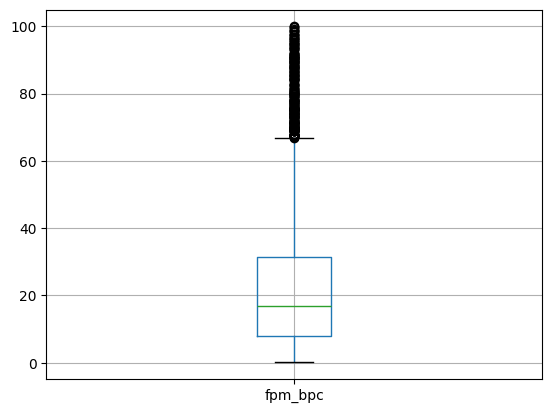

In [17]:
#Verificando outliers
df_sem_maiores_outliers[['fpm_bpc']].boxplot()

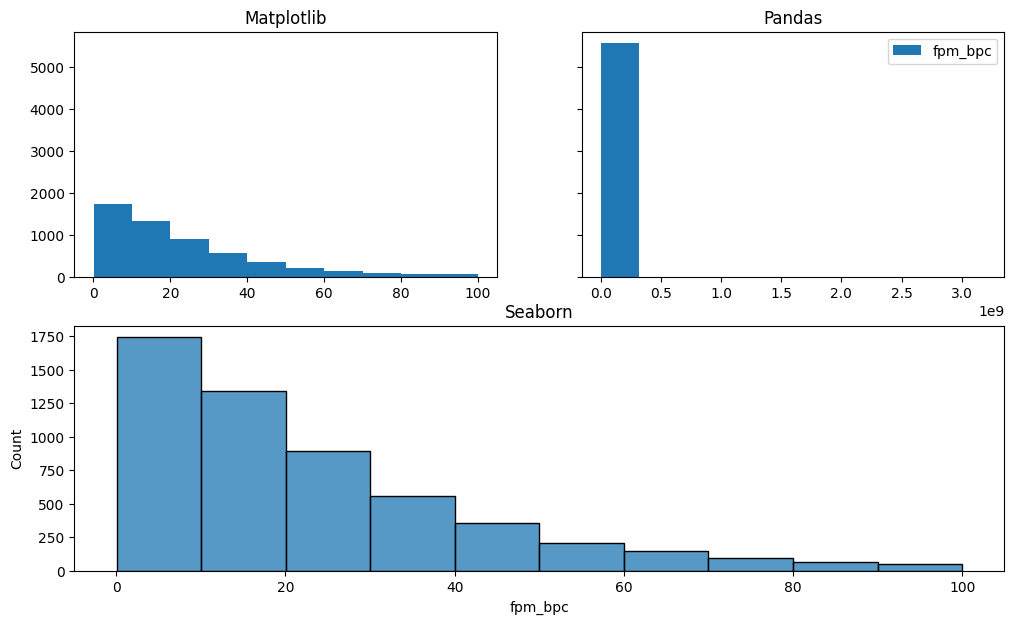

In [18]:
#Visualizando dados sem outliers
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=df_sem_maiores_outliers['fpm_bpc'], bins=10);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
df_bpc_fpm.plot.hist(column='fpm_bpc', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=df_sem_maiores_outliers, x='fpm_bpc', 
             multiple='stack', bins=10, ax=ax3);
             
# sns.histplot(data=pd_pbf_cadUnico, x='pbf_cadUnico_pob_ep', hue='Data', 
#             multiple='stack', bins=10, ax=ax3);

In [19]:
#discretizando ou criando classes
df_bpc_fpm['indice_bpc'] = pd.cut(df_bpc_fpm['fpm_bpc'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 800]) 
indice_bpc_12c = df_bpc_fpm['indice_bpc'].value_counts()
indice_bpc_12c = pd.DataFrame(indice_bpc_12c)
df_indice_bpc_12c = indice_bpc_12c.reset_index(drop=False).copy()
df_indice_bpc_12c['Classe'] = [1,2,3,4,5,6,7,11,8,9,10]
df_indice_bpc_12c

,indice_bpc,count,Classe
0,"(0, 10]",1724,1
1,"(10, 20]",1346,2
2,"(20, 30]",898,3
3,"(30, 40]",559,4
4,"(40, 50]",355,5
5,"(50, 60]",209,6
6,"(60, 70]",143,7
7,"(100, 800]",127,11
8,"(70, 80]",95,8
9,"(80, 90]",62,9


C:\Users\DELL\AppData\Local\Temp\ipykernel_10236\4253241273.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



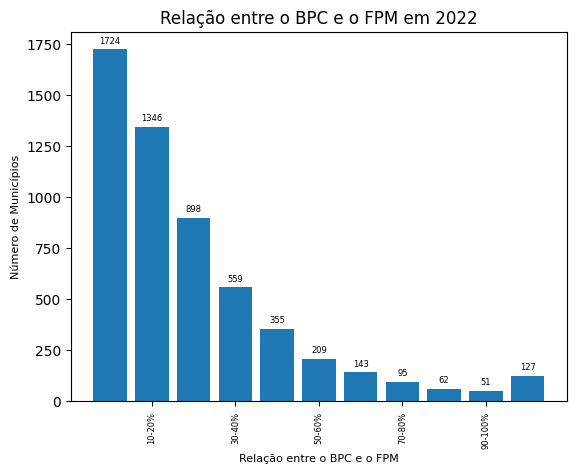

In [20]:
#visualizando dados por classe
fig10c, ax = plt.subplots()

X = df_indice_bpc_12c['Classe']
Y = df_indice_bpc_12c['count']
bars = ax.bar(X, Y)

plt.title('Relação entre o BPC e o FPM em 2022')

ax.set_xlabel('Relação entre o BPC e o FPM', fontsize=8)
ax.set_ylabel('Número de Municípios', fontsize=8)

ax.set_xticklabels(['','10-20%', '30-40%', '50-60%', '70-80%', '90-100%'], 
                   rotation=90, fontsize=6)

# Adicione etiquetas em todas as barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Deslocamento vertical das etiquetas
                textcoords="offset points",
                ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=90, fontsize=6)

plt.show()


In [21]:
#incluindo as classes no dataframe
df_bpc_fpm = pd.merge(df_bpc_fpm,df_indice_bpc_12c, how='left')

In [22]:
#preparando os dados para visualização dos mapas
df_bpc_fpm = pd.merge(df_bpc_fpm,df_mul_siafi_ibge, how='left')
df_bpc_fpm = df_bpc_fpm.drop(['nome','siafi_id'], axis=1)
df_bpc_fpm_limpa = df_bpc_fpm.drop(['ano','bpc_pcd_ben','bpc_idoso_ben','bpc_pcd_val','bpc_idoso_val'], axis=1)

In [23]:
#criando o mapa coroplético

#criando uma cópia segura dos dados
resultados_df = df_bpc_fpm_limpa.copy()

#criando dataframe com informações de georreferenciamento de municípios
georreferenciamento_df = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
georreferenciamento_df['codigo_ibge'] = georreferenciamento_df['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')

#cruzamento do dataframe resultados com as informações de georreferenciamento
resultados_df = pd.merge(df_bpc_fpm_limpa[['ibge_6', 'Classe']],
                         georreferenciamento_df[['codigo_ibge', 'nome', 'latitude', 'longitude']],
                         left_on='ibge_6',
                         right_on='codigo_ibge',
                         how='inner')

#puxar a malha geográfica do brasil a nível de município
import requests
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima&intrarregiao=municipio').json()

#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
from geojson_rewind import rewind
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

#construir o mapa choroplético com timeline no campo de ano
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

fig = px.choropleth(resultados_df,
                    geojson=geojson,
                    scope='south america',
                    color='Classe',
                    color_continuous_scale="Blues",
                    locations='ibge_6',
                    featureidkey='properties.codarea',
                    hover_name='nome').update_layout(height=800, width=1000, autosize=False)

fig.update_traces(marker_line_width=0)
fig.show()

In [24]:
#inserindo os dados de região e estados no dataframe e criando a base final
regioes['ibge_6'] = regioes['municipioCodigo'].apply(lambda x: int(str(x)[:6]))
regioes_limpa = regioes.drop(['_id','mesorregiaoCodigo','mesorregiaoNome','microrregiaoCodigo','microrregiaoNome','municipioCodigo','municipioCodigoAbreviado','municipioNome', 'kmlBrasil'], axis=1)
df_bpc_fpm_completa = pd.merge(df_bpc_fpm_limpa,regioes_limpa, how='left')
df_bpc_fpm_completa['ufCodigo'] = df_bpc_fpm_completa['ufCodigo'].fillna(24)
df_bpc_fpm_completa['ufNome'] = df_bpc_fpm_completa['ufNome'].fillna('Rio Grande do Norte')
df_bpc_fpm_completa['ufSigla'] = df_bpc_fpm_completa['ufSigla'].fillna('RN')
df_bpc_fpm_completa['ufCodigo'] = df_bpc_fpm_completa['ufCodigo'].astype(str)
df_bpc_fpm_completa['nome_mul'] = df_bpc_fpm_completa['Município_UF'].apply(lambda x: str(x)[:-4])
#criando uma coluna com o nome das regões baseada nos códigos das regiões
def categorize_uf_code(code):
    if code.startswith('1'):
        return 'Norte'
    elif code.startswith('2'):
        return 'Nordeste'
    elif code.startswith('3'):
        return 'Sudeste'
    elif code.startswith('4'):
        return 'Sul'
    else:
        return 'Centro-Oeste'
df_bpc_fpm_completa['Região'] = df_bpc_fpm_completa['ufCodigo'].apply(categorize_uf_code)
df_bpc_fpm_completa['count'] = 1
df_bpc_fpm_completa = df_bpc_fpm_completa.drop(['ufCodigo','nome_mul'], axis=1)

In [26]:
#criando arquivo csv final
# Salvando dataframe para streamlit
df_bpc_fpm_completa.to_csv('Streamlit\df_bpc_fpm_completa.csv', encoding = 'UTF-8')
df_bpc_fpm_completa.to_csv('data\IndiceGeral\df_bpc_fpm_completa.csv',encoding = 'UTF-8')

In [ ]:
df_bpc_fpm_completa.head(2)